In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [11]:
bf = pd.read_csv("./Experimentación/complejidades_bellmanFord.csv")
print(bf)

     n    p     m      tiempo
0   10  0.2    14     489.115
1   10  0.4    19     409.619
2   10  0.6    24     649.052
3   20  0.2    38     789.813
4   20  0.4    77    1635.650
5   20  0.8   143    3127.630
6   30  0.2    96    2779.250
7   30  0.4   169    5685.140
8   30  0.8   354   11500.000
9   40  0.2   142    6193.650
10  40  0.4   309   17760.400
11  40  0.8   635   28365.300
12  50  0.2   248   16509.300
13  50  0.4   477   34770.900
14  50  0.8   995   62140.000
15  60  0.2   343   26061.700
16  60  0.4   692   56891.600
17  60  0.8  1435  111108.000
18  70  0.2   488   53944.200
19  70  0.4   951  100943.000
20  70  0.8  1932  216204.000
21  80  0.2   637   83300.300
22  80  0.4  1259  136033.000
23  80  0.6  1929  250597.000
24  80  0.8  2505  307161.000


In [20]:
is_02 = bf["p"] == 0.2
bf_02 = bf[is_02]
is_04 = bf["p"] == 0.4
bf_04 = bf[is_04]
is_08 = bf["p"] == 0.8
bf_08 = bf[is_08]

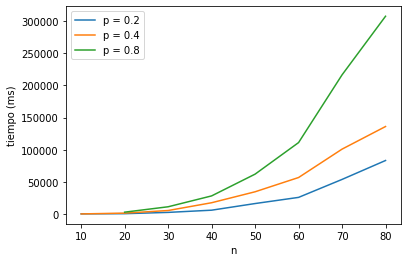

In [22]:
fig = plt.figure();
# Ploteamos curva de tiempo de FB vs la curva de complejidad.
#df_exp = pd.DataFrame({"n": [i for i in range(1, 30)], "Esperado": [ i*(2**i) for i in range(1, 30)]});
ax1 = sns.lineplot(x="n", y="tiempo", data=bf_02);
ax1 = sns.lineplot(x="n", y="tiempo", data=bf_04);
ax1 = sns.lineplot(x="n", y="tiempo", data=bf_08);
#ax1 = sns.lineplot(x="n", y="Esperado", data=df_exp);
ax1.legend(["p = 0.2", "p = 0.4", "p = 0.8"]);
plt.ylabel("tiempo (ms)");

Nos muestra que crece con n y con la densidad. Como los agrupamos por p y no por m, no nos dice nada de cómo es este crecimiento, lineal, cuadr, etc. Para eso hagamos uno de correlacion



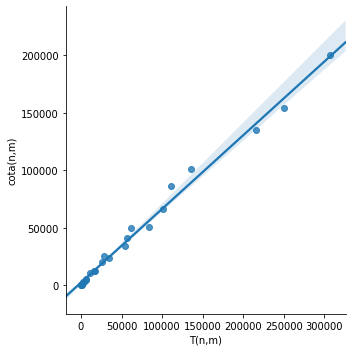

In [25]:
 #Correlación
bf["cota"] = bf["n"] * (bf["m"]);
ax1 = sns.lmplot(x='tiempo', y='cota', data=bf);
plt.xlabel("T(n,m)");
plt.ylabel("cota(n,m)");

In [26]:
r = np.corrcoef(bf["tiempo"], bf["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))


El coeficiente de correlación de Pearson es: r=0.9961252985241001


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [27]:
dr = pd.read_csv("./Experimentación/complejidades_dijkstra.csv")
print(dr)

     n    p    m        tiempo
0    2  0.2    1       1.80896
1    2  0.4    1     323.06000
2    2  0.8    1     278.19200
3    4  0.2    3     811.87000
4    4  0.4    4    1607.44000
5    4  0.8    5    1604.60000
6    6  0.2    6    4460.95000
7    6  0.4    8    5441.89000
8    6  0.8   12    8596.64000
9    8  0.2    8    4522.63000
10   8  0.4   15   12350.10000
11   8  0.8   21   24464.70000
12  10  0.2   12   14200.80000
13  10  0.4   17   12730.50000
14  10  0.8   37   42444.50000
15  12  0.2   19   24790.00000
16  12  0.4   36   64754.70000
17  12  0.8   56   94264.30000
18  14  0.2   17   18765.90000
19  14  0.4   37   64061.90000
20  14  0.8   67  140095.00000
21  16  0.2   24   47515.20000
22  16  0.4   53  123515.00000
23  16  0.8  100  258319.00000
24  18  0.2   37   91640.10000
25  18  0.4   61  143090.00000
26  18  0.8  122  345332.00000
27  20  0.2   42  121371.00000
28  20  0.4   77  240279.00000
29  25  0.2   63  232806.00000
30  30  0.2   89  429104.00000
31  35  

In [56]:
isdr_02 = dr["p"] == 0.2
dr_02 = dr[isdr_02]
isdr_04 = dr["p"] == 0.4
dr_04 = dr[isdr_04]
isdr_08 = dr["p"] == 0.8
dr_08 = dr[isdr_08]

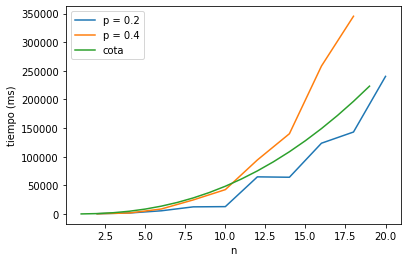

In [110]:
fig = plt.figure();
# Ploteamos curva de tiempo de FB vs la curva de complejidad.
dr_n2logn = pd.DataFrame({"n": [i for i in range(1, 20)], "Esperado": [ i*i*(math.log(i))*210 for i in range(1, 20)]});
#ax1 = sns.lineplot(x="n", y="tiempo", data=dr_02);
ax1 = sns.lineplot(x="n", y="tiempo", data=dr_04);
ax1 = sns.lineplot(x="n", y="tiempo", data=dr_08);
ax1 = sns.lineplot(x="n", y="Esperado", data=dr_n2logn);
ax1.legend(["p = 0.2", "p = 0.4", "cota"]);
#ax1.legend(["Dijkstra", "Cota"]);
plt.ylabel("tiempo (ms)");

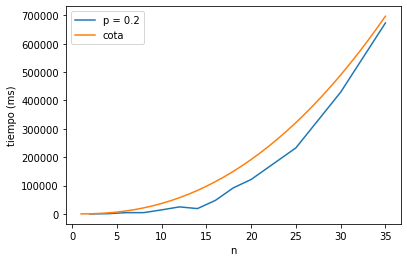

In [67]:
fig = plt.figure();
# Ploteamos curva de tiempo de FB vs la curva de complejidad.
dr_n2logn = pd.DataFrame({"n": [i for i in range(1, 36)], "Esperado": [ i*i*(math.log(i))*160 for i in range(1, 36)]});
ax1 = sns.lineplot(x="n", y="tiempo", data=dr_02);
#ax1 = sns.lineplot(x="n", y="tiempo", data=dr_04);
#ax1 = sns.lineplot(x="n", y="tiempo", data=dr_08);
ax1 = sns.lineplot(x="n", y="Esperado", data=dr_n2logn);
ax1.legend(["p = 0.2", "cota"]);
#ax1.legend(["Dijkstra", "Cota"]);
plt.ylabel("tiempo (ms)");

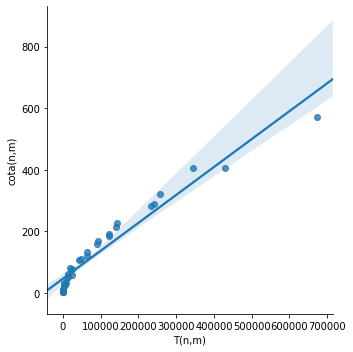

In [108]:
dr["cota"] = (dr["n"] + dr["m"]) *  (np.log(dr["n"]));
ax1 = sns.lmplot(x='tiempo', y='cota', data=dr);
plt.xlabel("T(n,m)");
plt.ylabel("cota(n,m)");

In [107]:
r = np.corrcoef(dr["tiempo"], dr["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))


El coeficiente de correlación de Pearson es: r=0.9698684069491449


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [111]:
dd = pd.read_csv("./Experimentación/complejidades_dijkstraDense.csv")
print(dd)

      n    p     m        tiempo
0    10  0.2    11     20.037100
1    10  0.4    17     25.900400
2    10  0.8    36     44.516700
3    20  0.2    43    174.304000
4    20  0.4    92    259.296000
5    20  0.8   160    367.279000
6    30  0.2    81    569.469000
7    30  0.4   171    755.609000
8    30  0.8   353   1103.930000
9    40  0.2   152   1357.170000
10   40  0.4   313   1821.940000
11   40  0.8   641   2627.930000
12   50  0.2   236   2720.940000
13   50  0.4   501   3598.590000
14   50  0.8   964   5038.380000
15   60  0.2   373   4865.450000
16   60  0.4   746   6374.780000
17   60  0.8  1450   8825.530000
18   70  0.2   474   7678.590000
19   70  0.4   939   9820.910000
20   70  0.8  1963  13900.400000
21   80  0.2   597  11648.200000
22   80  0.4  1286  15056.700000
23   80  0.8  2539  21407.900000
24   90  0.2   798  16558.000000
25   90  0.4  1583  21008.300000
26   90  0.8  3171  29673.100000
27  100  0.2   978  23074.500000
28  100  0.4  1940  29500.100000
29  100  0

In [112]:
isdd_02 = dd["p"] == 0.2
dd_02 = dd[isdd_02]
isdd_04 = dd["p"] == 0.4
dd_04 = dd[isdd_04]
isdd_08 = dd["p"] == 0.8
dd_08 = dd[isdd_08]

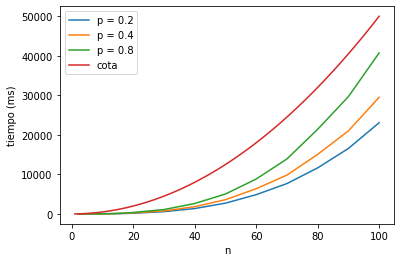

In [117]:
fig = plt.figure();
# Ploteamos curva de tiempo de FB vs la curva de complejidad.
dd_n2 = pd.DataFrame({"n": [i for i in range(1, 101)], "Esperado": [ i*i*5 for i in range(1, 101)]});
ax1 = sns.lineplot(x="n", y="tiempo", data=dd_02);
ax1 = sns.lineplot(x="n", y="tiempo", data=dd_04);
ax1 = sns.lineplot(x="n", y="tiempo", data=dd_08);
ax1 = sns.lineplot(x="n", y="Esperado", data=dd_n2);
ax1.legend(["p = 0.2", "p = 0.4", "p = 0.8", "cota"]);
#ax1.legend(["Dijkstra", "Cota"]);
plt.ylabel("tiempo (ms)");

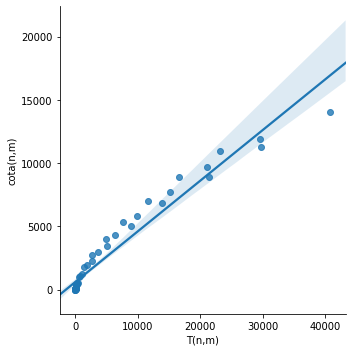

In [124]:
dd["cota"] = (dd["n"]  * dd["n"] + dd["m"] );
ax1 = sns.lmplot(x='tiempo', y='cota', data=dd);
plt.xlabel("T(n,m)");
plt.ylabel("cota(n,m)");

In [125]:
r = np.corrcoef(dd["tiempo"], dd["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))


El coeficiente de correlación de Pearson es: r=0.9747592308408862


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [127]:
f = pd.read_csv("./Experimentación/complejidades_floyd.csv")
print(f)

     n    p    m      tiempo
0   10  0.2   10    1161.510
1   10  0.4   19    1810.690
2   10  0.8   33    2438.780
3   20  0.2   41   16999.700
4   20  0.4   75   19775.500
5   20  0.8  153   23382.500
6   30  0.2   88   52973.600
7   30  0.4  179   72802.100
8   30  0.8  351   89099.100
9   40  0.2  135  132310.000
10  40  0.4  297  189906.000
11  40  0.8  645  210345.000
12  50  0.2  240  303216.000
13   5  0.2    4     165.822
14   5  0.4    5     179.780
15   5  0.8    8     219.049
16  15  0.2   22    4461.500
17  15  0.4   43    8360.390
18  15  0.8   89    9471.620
19  25  0.2   54   26419.900
20  25  0.4  118   39842.100
21  25  0.8  243   49283.700
22  35  0.2  116   85394.400
23  35  0.4  242  127997.000
24  35  0.8  482  136717.000
25  45  0.2  223  240479.000
26  45  0.4  400  279090.000
27  45  0.8  787  304660.000


In [128]:
isf_02 = f["p"] == 0.2
f_02 = f[isf_02]
isf_04 = f["p"] == 0.4
f_04 = f[isf_04]
isf_08 = f["p"] == 0.8
f_08 = f[isf_08]

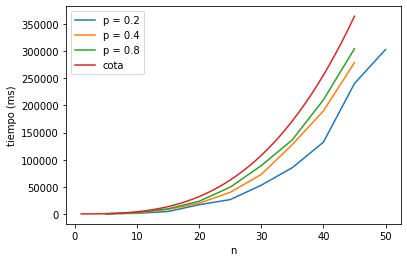

In [132]:
fig = plt.figure();
# Ploteamos curva de tiempo de FB vs la curva de complejidad.
f_n3 = pd.DataFrame({"n": [i for i in range(1, 46)], "Esperado": [ i*i*i*4 for i in range(1, 46)]});
ax1 = sns.lineplot(x="n", y="tiempo", data=f_02);
ax1 = sns.lineplot(x="n", y="tiempo", data=f_04);
ax1 = sns.lineplot(x="n", y="tiempo", data=f_08);
ax1 = sns.lineplot(x="n", y="Esperado", data=f_n3);
ax1.legend(["p = 0.2", "p = 0.4", "p = 0.8", "cota"]);
#ax1.legend(["Dijkstra", "Cota"]);
plt.ylabel("tiempo (ms)");

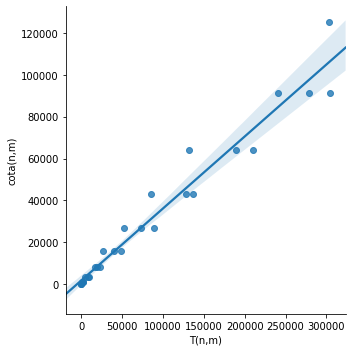

In [133]:
f["cota"] = (f["n"]  * f["n"] * f["n"] );
ax1 = sns.lmplot(x='tiempo', y='cota', data=f);
plt.xlabel("T(n,m)");
plt.ylabel("cota(n,m)");

In [135]:
r = np.corrcoef(f["tiempo"], f["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))


El coeficiente de correlación de Pearson es: r=0.9790472583236288


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

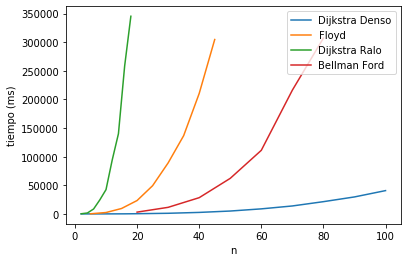

In [140]:
fig = plt.figure();
# Ploteamos curva de tiempo de FB vs la curva de complejidad.
#f_n3 = pd.DataFrame({"n": [i for i in range(1, 51)], "Esperado": [ i*i*i*4 for i in range(1, 51)]});
#ax1 = sns.lineplot(x="n", y="tiempo", data=dd_02);
#ax1 = sns.lineplot(x="n", y="tiempo", data=dd_04);
ax1 = sns.lineplot(x="n", y="tiempo", data=dd_08);
#ax1 = sns.lineplot(x="n", y="tiempo", data=f_02);
#ax1 = sns.lineplot(x="n", y="tiempo", data=f_04);
ax1 = sns.lineplot(x="n", y="tiempo", data=f_08);
#ax1 = sns.lineplot(x="n", y="tiempo", data=dr_02);
#ax1 = sns.lineplot(x="n", y="tiempo", data=dr_04);
ax1 = sns.lineplot(x="n", y="tiempo", data=dr_08);
#ax1 = sns.lineplot(x="n", y="tiempo", data=bf_02);
#ax1 = sns.lineplot(x="n", y="tiempo", data=bf_04);
ax1 = sns.lineplot(x="n", y="tiempo", data=bf_08);
#ax1 = sns.lineplot(x="n", y="Esperado", data=f_n3);
#ax1.legend(["p = 0.2", "p = 0.4", "p = 0.8", "cota"]);
ax1.legend(["Dijkstra Denso", "Floyd", "Dijkstra Ralo", "Bellman Ford", "f4", "f8", "r2", "r4", "r8", "bf2", "bf4", "bf8"]);
#ax1.legend(["Dijkstra", "Cota"]);
plt.ylabel("tiempo (ms)");

In [146]:
isdd_chico = dd["n"] < 20 
dd_chico = dd[isdd_chico]

isddch_02 = dd_chico["p"] == 0.2
ddch_02 = dd_chico[isddch_02]
isddch_04 = dd_chico["p"] == 0.4
ddch_04 = dd_chico[isddch_04]
isddch_08 = dd_chico["p"] == 0.8
ddch_08 = dd_chico[isddch_08]
print(ddch_08)

     n    p    m      tiempo  cota
2   10  0.8   36   44.516700   136
32   2  0.8    1    0.582345     5
35   4  0.8    6    2.522980    22
38   6  0.8   14   11.036600    50
41   8  0.8   21   20.687200    85
44  12  0.8   55   77.432100   199
47  14  0.8   77  109.372000   273
50  16  0.8   91  150.623000   347
53  18  0.8  126  248.086000   450
